In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import warnings

warnings.filterwarnings('ignore')

In [15]:
pools = ['Pool_49', 'Pool_52', 'Pool_60']
algorithms = [('DeepNovo', 'deepnovo'), ('Novor', 'novor'), ('DirecTag', 'direcTag'), ('PEAKS', 'peaks')]

In [19]:
combinations = itertools.product(pools, algorithms)
for comb in combinations:
    pool = comb[0]
    result_file = comb[1][1]
    alg = comb[1][0]
    # read dataset
    data = pd.read_csv(f'../../Data/ScoringResults/{pool}/{result_file}_scored.tsv', sep='\t', index_col=0)

    # plot similarity distribution
    plt.figure()
    similarity_pt = sns.histplot(data['Similarity'], bins=100)
    similarity_pt.set_title(f'{" ".join(pool.split("_"))} | {alg} - Similarity Distribution')
    plt.savefig(f'../../Data/Analysis/{pool}/{result_file}/hist_similarity.png')
    plt.close()

    # plot similarity boxplot
    plt.figure()
    similarity_box = plt.boxplot(data['Similarity'])
    plt.title(f'{" ".join(pool.split("_"))} | {alg} - Similarity Boxplot')
    plt.savefig(f'../../Data/Analysis/{pool}/{result_file}/box_similarity.png')
    plt.close()

    # plot identity distribution
    plt.figure()
    identity_plt =sns.histplot(data['Identity'], bins=100, color='red')
    identity_plt.set_title(f'{" ".join(pool.split("_"))} | {alg} - Identity Distribution')
    plt.savefig(f'../../Data/Analysis/{pool}/{result_file}/hist_identity.png')
    plt.close()

    # plot identity boxplot
    plt.figure()
    identity_box = plt.boxplot(data['Identity'])
    plt.title(f'{" ".join(pool.split("_"))} | {alg} - Identity Boxplot')
    plt.savefig(f'../../Data/Analysis/{pool}/{result_file}/box_identity.png')
    plt.close()

    # plot similarity vs identity
    plt.figure()
    sns.scatterplot(data=data, x='Similarity', y='Identity')
    plt.title(f'{alg} - Similarity vs Identity')
    plt.savefig(f'../../Data/Analysis/{pool}/{result_file}/scatter_similarity_identity.png')
    plt.close()

    # plot levenstein distance distribution
    if 'Levenshtein' in data.columns:
        plt.figure()
        sns.histplot(data['Levenshtein'], bins=100, color='green')
        plt.title(f'{" ".join(pool.split("_"))} | {alg} - Levenshtein Distance Distribution')
        plt.savefig(f'../../Data/Analysis/{pool}/{result_file}/hist_levenshtein.png')
        plt.close()

        # plot levenstein distance boxplot
        plt.figure()
        levenstein_box = plt.boxplot(data['Levenshtein'])
        plt.title(f'{" ".join(pool.split("_"))} | {alg} - Levenshtein Distance Boxplot')
        plt.savefig(f'../../Data/Analysis/{pool}/{result_file}/box_levenshtein.png')
        plt.close()


    # plot local alignment score distribution
    plt.figure()
    sns.histplot(data['Local Alignment'], bins=100, color='purple')
    plt.title(f'{" ".join(pool.split("_"))} | {alg} - Local Alignment Score Distribution')
    plt.savefig(f'../../Data/Analysis/{pool}/{result_file}/hist_local_alignment.png')
    plt.close()

    # plot global alignment score distribution
    plt.figure()
    sns.histplot(data['Global Alignment'], bins=100, color='orange')
    plt.title(f'{" ".join(pool.split("_"))} | {alg} - Global Alignment Score Distribution')
    plt.savefig(f'../../Data/Analysis/{pool}/{result_file}/hist_global_alignment.png')
    plt.close()

    # plot normalized local alignment score distribution
    plt.figure()
    sns.histplot(data['Normalized Local Alignment'], bins=100, color='brown')
    plt.title(f'{" ".join(pool.split("_"))} | {alg} - Normalized Local Alignment Score Distribution')
    plt.savefig(f'../../Data/Analysis/{pool}/{result_file}/hist_norm_local_alignment.png')
    plt.close()
    # plot normalized global alignment score distribution
    plt.figure()
    sns.histplot(data['Normalized Global Alignment'], bins=100, color='pink')
    plt.title(f'{" ".join(pool.split("_"))} | {alg} - Normalized Global Alignment Score Distribution')
    plt.savefig(f'../../Data/Analysis/{pool}/{result_file}/hist_norm_global_alignment.png')
    plt.close()

    # print details
    print(f'Algorithm: {alg}', pool)
    print('100% similarity:', (data.query('Similarity == 1.0').shape[0]))
    print('100% identity:', (data.query('Identity == 1.0').shape[0]))
    if 'Levenshtein' in data.columns:
        print('0 levenshtein:', (data.query('Levenshtein == 0').shape[0]))
    print('total count:', data.shape[0], '\n')

Algorithm: DeepNovo Pool_49
100% similarity: 10896
100% identity: 3589
0 levenshtein: 3589
total count: 30256 

Algorithm: Novor Pool_49
100% similarity: 15629
100% identity: 8250
0 levenshtein: 8250
total count: 33877 

Algorithm: DirecTag Pool_49
100% similarity: 121002
100% identity: 60068
0 levenshtein: 0
total count: 251849 

Algorithm: PEAKS Pool_49
100% similarity: 15204
100% identity: 8156
0 levenshtein: 8156
total count: 28481 

Algorithm: DeepNovo Pool_52
100% similarity: 11688
100% identity: 2657
0 levenshtein: 2657
total count: 27962 

Algorithm: Novor Pool_52
100% similarity: 15252
100% identity: 8848
0 levenshtein: 8848
total count: 31591 

Algorithm: DirecTag Pool_52
100% similarity: 105899
100% identity: 46951
0 levenshtein: 0
total count: 230256 

Algorithm: PEAKS Pool_52
100% similarity: 16174
100% identity: 9555
0 levenshtein: 9555
total count: 30035 

Algorithm: DeepNovo Pool_60
100% similarity: 13072
100% identity: 4186
0 levenshtein: 4186
total count: 24707 

Algo

KeyboardInterrupt: 

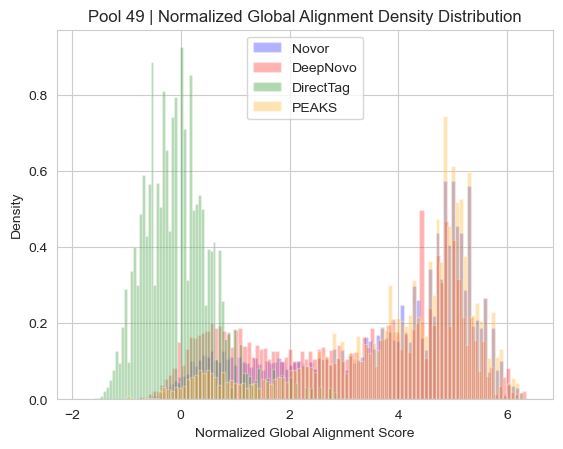

In [87]:
for p in pools:
    metrics = ['Local Alignment', 'Global Alignment', 'Normalized Local Alignment', 'Normalized Global Alignment']
    metrics_file = ['local_alignment', 'global_alignment', 'norm_local_alignment', 'norm_global_alignment']
    novor_df = pd.read_csv(f'../../Data/ScoringResults/{p}/novor_scored.tsv', sep='\t', index_col=0)
    deepnovo_df = pd.read_csv(f'../../Data/ScoringResults/{p}/deepnovo_scored.tsv', sep='\t', index_col=0)
    directTag_df = pd.read_csv(f'../../Data/ScoringResults/{p}/direcTag_scored.tsv', sep='\t', index_col=0)
    peaks_df = pd.read_csv(f'../../Data/ScoringResults/{p}/peaks_scored.tsv', sep='\t', index_col=0)
    for met, file_name in zip(metrics, metrics_file):
        plt.figure()
        plt.hist(novor_df[met], bins=100, color='blue', alpha=0.3, label='Novor', density=True)
        plt.hist(deepnovo_df[met], bins=100, color='red', alpha=0.3, label='DeepNovo', density=True)
        plt.hist(directTag_df[met], bins=100, color='green', alpha=0.3, label='DirectTag', density=True)
        plt.hist(peaks_df[met], bins=100, color='orange', alpha=0.3, label='PEAKS', density=True)
        plt.title(f'{" ".join(p.split("_"))} | {met} Density Distribution')
        plt.legend()
        plt.xlabel(f'{met} Score')
        plt.ylabel('Density')
        plt.savefig(f'../../Data/Analysis/{p}/hist_{file_name}.png')
        plt.close()

amount expected spectra: 50154
amount idenfied spectra: 33910


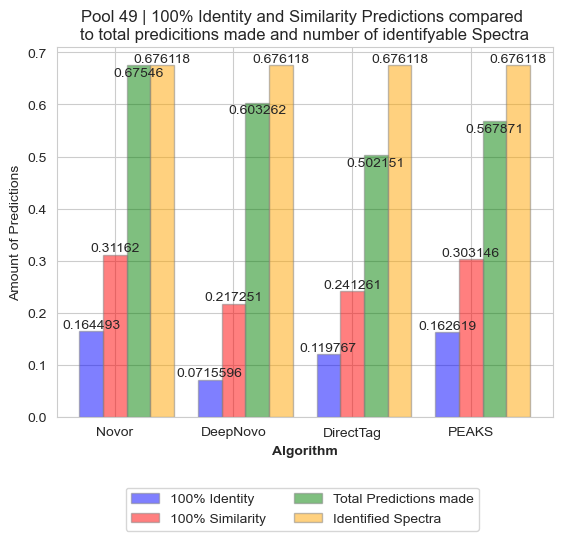

amount expected spectra: 49044
amount idenfied spectra: 31605


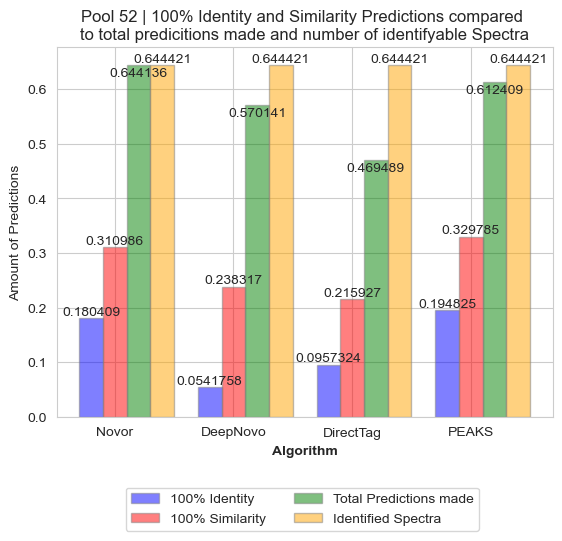

amount expected spectra: 49461
amount idenfied spectra: 31502


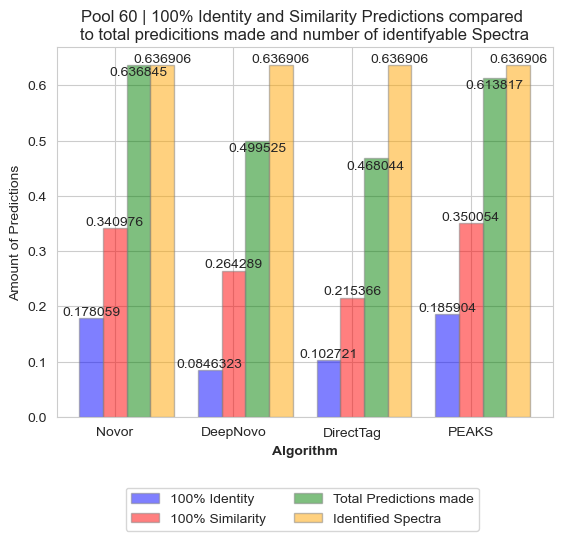

In [74]:
for p in pools:
    # load the actual data
    expected_pool = pd.read_csv(
            f"../../Data/Datasets/{p}/Thermo_SRM_{p}_01_01_3xHCD-1h-R2-tryptic/msmsScans.txt",
            sep='\t')
    count_spectra = expected_pool.shape[0]
    count_identified = expected_pool.query("Identified == '+'").shape[0]
    print("amount expected spectra:", count_spectra)
    print("amount idenfied spectra:", count_identified)
    # load the scoring results
    novor_df = pd.read_csv(f'../../Data/ScoringResults/{p}/novor_scored.tsv', sep='\t', index_col=None)
    deepnovo_df = pd.read_csv(f'../../Data/ScoringResults/{p}/deepnovo_scored.tsv', sep='\t', index_col=None)
    directTag_df = pd.read_csv(f'../../Data/ScoringResults/{p}/direcTag_scored.tsv', sep='\t', index_col=None)
    peaks_df = pd.read_csv(f'../../Data/ScoringResults/{p}/peaks_scored.tsv', sep='\t', index_col=None)

    # get the amount of predictions with 100% identity
    novor_100_id = novor_df.query('Identity == 1.0').shape[0]
    deepnovo_100_id = deepnovo_df.query('Identity == 1.0').shape[0]
    directTag_100_id = directTag_df.query('Identity == 1.0').shape[0]
    peaks_100_id = peaks_df.query('Identity == 1.0').shape[0]

     # get the amount of predictions with 100% similarity
    novor_100_sim = novor_df.query('Similarity == 1.0').shape[0]
    deepnovo_100_sim = deepnovo_df.query('Similarity == 1.0').shape[0]
    directTag_100_sim = directTag_df.query('Similarity == 1.0').shape[0]
    peaks_100_sim = peaks_df.query('Similarity == 1.0').shape[0]

    # get number of predictions made
    novor_count = novor_df.shape[0]
    deepnovo_count = deepnovo_df.shape[0]
    directTag_count = directTag_df.shape[0]
    peaks_count = peaks_df.shape[0]

    # create grouped bar plot
    fig, ax = plt.subplots()
    barWidth = 0.2
    bars1 = [novor_100_id/count_spectra, deepnovo_100_id/count_spectra, (directTag_100_id/10)/count_spectra, peaks_100_id/count_spectra]
    bars2 = [novor_100_sim/count_spectra, deepnovo_100_sim/count_spectra, (directTag_100_sim/10)/count_spectra, peaks_100_sim/count_spectra]
    bars3 = [novor_count/count_spectra, deepnovo_count/count_spectra, (directTag_count/10)/count_spectra, peaks_count/count_spectra]
    bars4 = [count_identified/count_spectra, count_identified/count_spectra, count_identified/count_spectra , count_identified/count_spectra ]
    r1 = range(len(bars1))
    r2 = [x + barWidth for x in r1]
    # move label for bar3 a bit to the bottom
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    #plt.bar(r1, bars1, color='blue', alpha=0.3, width=barWidth, edgecolor='grey', label='100% Identity')
    plt.bar_label(plt.bar(r1, bars1, color='blue', alpha=0.5, width=barWidth, edgecolor='grey', label='100% Identity'))
    #plt.bar(r2, bars2, color='red', alpha=0.3, width=barWidth, edgecolor='grey', label='100% Similarity')
    plt.bar_label(plt.bar(r2, bars2, color='red', alpha=0.5, width=barWidth, edgecolor='grey', label='100% Similarity'))

    plt.bar_label(plt.bar(r3, bars3, color='green', alpha=0.5, width=barWidth, edgecolor='grey', label='Total Predictions made'), padding=-10)
    plt.bar_label(plt.bar(r4, bars4, color='orange', alpha=0.5, width=barWidth, edgecolor='grey', label='Identified Spectra'))
    plt.xlabel('Algorithm', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], ['Novor', 'DeepNovo', 'DirectTag', 'PEAKS'])
    plt.ylabel('Amount of Predictions')
    plt.title(f'{" ".join(p.split("_"))} | 100% Identity and Similarity Predictions compared \nto total predicitions made and number of identifyable Spectra')
    plt.legend()
    # Put a legend to on the bottom of the plot
    ax.legend(loc='center left', bbox_to_anchor=(0.125, -0.25), ncol=2)
    #plt.savefig(f'../../Data/Analysis/{p}/grouped_bar_plot_amout_predictions.png')
    #plt.close()
    plt.show()

amount expected spectra: 50154
amount idenfied spectra: 33910


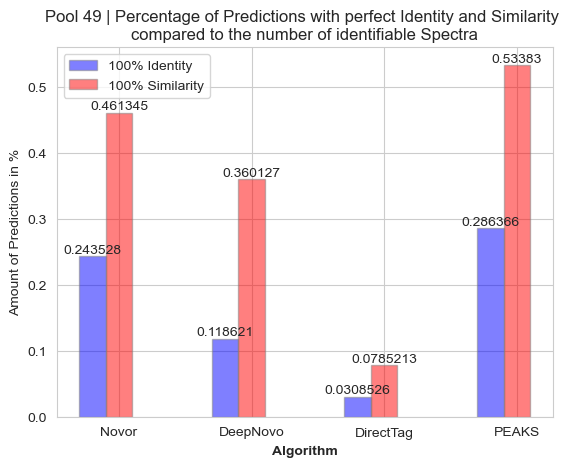

amount expected spectra: 49044
amount idenfied spectra: 31605


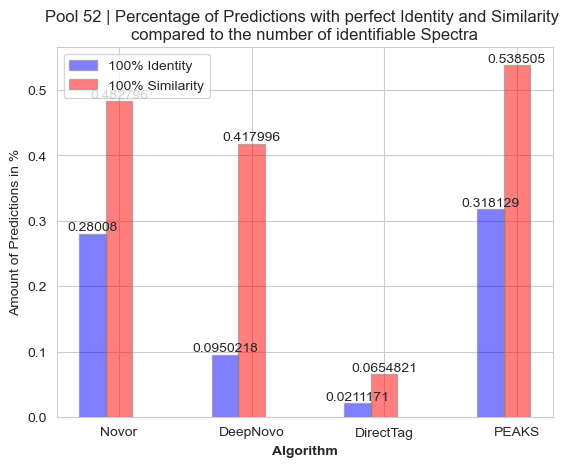

amount expected spectra: 49461
amount idenfied spectra: 31502


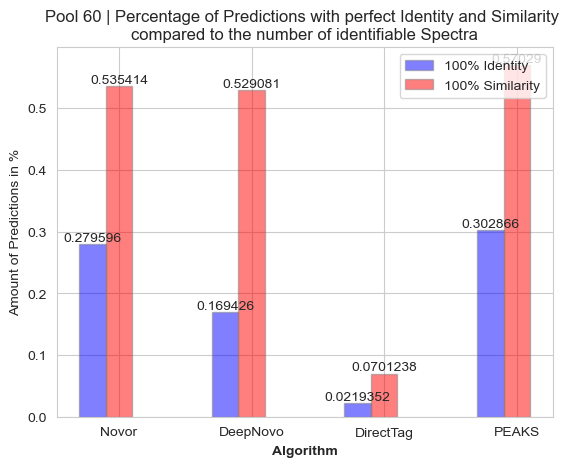

In [5]:
from Pipeline.AlgorithmResultParsers.DirecTagParser import DirecTagParser
direcTagFiles = [
    'Run_1/01640c_BA7-Thermo_SRM_Pool_49_01_01-3xHCD-1h-R2.tags',
    'Run_1/01640c_BD7-Thermo_SRM_Pool_52_01_01-3xHCD-1h-R2.tags',
    'Run_1/01640c_BD8-Thermo_SRM_Pool_60_01_01-3xHCD-1h-R2.tags']
for p, f in zip(pools, direcTagFiles):
    # load the actual data
    expected_pool = pd.read_csv(
            f"../../Data/Datasets/{p}/Thermo_SRM_{p}_01_01_3xHCD-1h-R2-tryptic/msmsScans.txt",
            sep='\t')
    count_spectra = expected_pool.shape[0]
    count_identified = expected_pool.query("Identified == '+'").shape[0]
    print("amount expected spectra:", count_spectra)
    print("amount idenfied spectra:", count_identified)


    # read and group the predicted tags
    direcTag_raw_df = DirecTagParser(f"../../Data/AlgorithmResults/{p}/DirecTag/{f}", 25).parse()
    direcTag_raw_df = direcTag_raw_df.groupby("ID")["Predicted"].apply(list)



    # load the scoring results
    novor_df = pd.read_csv(f'../../Data/ScoringResults/{p}/novor_scored.tsv', sep='\t', index_col=None)
    deepnovo_df = pd.read_csv(f'../../Data/ScoringResults/{p}/deepnovo_scored.tsv', sep='\t', index_col=None)
    directTag_df = pd.read_csv(f'../../Data/ScoringResults/{p}/direcTag_scored.tsv', sep='\t', index_col=None)
    peaks_df = pd.read_csv(f'../../Data/ScoringResults/{p}/peaks_scored.tsv', sep='\t', index_col=None)

    # get the amount of predictions with 100% identity
    novor_100_id = novor_df.query('Identity == 1.0').shape[0]
    deepnovo_100_id = deepnovo_df.query('Identity == 1.0').shape[0]
    # calculate the percentage of correct tags per spectrum
    directTag_100_id = directTag_df.groupby("ID")["Identity"].apply(list)
    correctTag_percentage = list()
    for k, v in direcTag_raw_df.items():
        if k in directTag_100_id:
            correctTag_percentage.append([k, sum([1 for i in directTag_100_id[k] if i == 1.0]) / len(v)])
    directTag_100_id =pd.DataFrame(correctTag_percentage, columns=["ID", "CorrectTagPercentage"])
    directTag_100_id = directTag_100_id.query("CorrectTagPercentage == 1.0").shape[0]
    peaks_100_id = peaks_df.query('Identity == 1.0').shape[0]

     # get the amount of predictions with 100% similarity
    novor_100_sim = novor_df.query('Similarity == 1.0').shape[0]
    deepnovo_100_sim = deepnovo_df.query('Similarity == 1.0').shape[0]
    # calculate the percentage of correct tags per spectrum
    directTag_100_sim = directTag_df.groupby("ID")["Similarity"].apply(list)
    correctTag_percentage = list()
    for k, v in direcTag_raw_df.items():
        if k in directTag_100_sim:
            correctTag_percentage.append([k, sum([1 for i in directTag_100_sim[k] if i == 1.0]) / len(v)])
    directTag_100_sim =pd.DataFrame(correctTag_percentage, columns=["ID", "CorrectTagPercentage"])
    directTag_100_sim = directTag_100_sim.query("CorrectTagPercentage == 1.0").shape[0]
    peaks_100_sim = peaks_df.query('Similarity == 1.0').shape[0]

    # get number of predictions made
    novor_count = novor_df.shape[0]
    deepnovo_count = deepnovo_df.shape[0]
    directTag_count =  directTag_df["ID"].nunique()
    peaks_count = peaks_df.shape[0]

    # create grouped bar plot
    fig, ax = plt.subplots()
    barWidth = 0.2
    bars1 = [novor_100_id/novor_count, deepnovo_100_id/deepnovo_count, (directTag_100_id)/directTag_count, peaks_100_id/peaks_count]
    bars2 = [novor_100_sim/novor_count, deepnovo_100_sim/deepnovo_count, (directTag_100_sim)/directTag_count, peaks_100_sim/peaks_count]
    #bars3 = [novor_count/count_spectra, deepnovo_count/count_spectra, (directTag_count)/count_spectra, peaks_count/count_spectra]
    #bars4 = [count_identified/count_spectra, count_identified/count_spectra, count_identified/count_spectra , count_identified/count_spectra ]
    r1 = range(len(bars1))
    r2 = [x + barWidth for x in r1]
    # move label for bar3 a bit to the bottom
    #r3 = [x + barWidth for x in r2]
    #r4 = [x + barWidth for x in r3]
    #plt.bar(r1, bars1, color='blue', alpha=0.3, width=barWidth, edgecolor='grey', label='100% Identity')
    plt.bar_label(plt.bar(r1, bars1, color='blue', alpha=0.5, width=barWidth, edgecolor='grey', label='100% Identity'))
    #plt.bar(r2, bars2, color='red', alpha=0.3, width=barWidth, edgecolor='grey', label='100% Similarity')
    plt.bar_label(plt.bar(r2, bars2, color='red', alpha=0.5, width=barWidth, edgecolor='grey', label='100% Similarity'))

    #plt.bar_label(plt.bar(r3, bars3, color='green', alpha=0.5, width=barWidth, edgecolor='grey', label='Total Predictions made'), padding=-10)
    #plt.bar_label(plt.bar(r4, bars4, color='orange', alpha=0.5, width=barWidth, edgecolor='grey', label='Identified Spectra'))
    plt.xlabel('Algorithm', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], ['Novor', 'DeepNovo', 'DirectTag', 'PEAKS'])
    plt.ylabel('Amount of Predictions in %')
    plt.title(f'{" ".join(p.split("_"))} | Percentage of Predictions with perfect Identity and Similarity \ncompared to the number of identifiable Spectra')
    plt.legend()
    # Put a legend to on the bottom of the plot
    #ax.legend(loc='center left', bbox_to_anchor=(0.125, -0.25), ncol=2)
    #plt.savefig(f'../../Data/Analysis/{p}/grouped_bar_plot_amout_predictions.png')
    #plt.close()
    plt.show()

# Percentage of predictions with perfect Identity and Similarity for each pool

For each 4 of the algorithms, caluculate the number of predictions with 100% identity and similarity and compare it to the total number of predictions made. Repeat this for each pool.

For DirecTag, the number of predictions with 100% identity and similarity is calculated by comparing the predicted tags to the scoring results. The percentage of correct tags per spectrum is calculated and if all tags for a spectrum are correct, the spectrum is counted as a correct prediction. The number of correct predictions is then divided by the number of unique spectra to get the percentage of correct predictions.

The output is a grouped bar plot showing the percentage of predictions with perfect Identity and Similarity for each pool for each algorithm. It is saved as a png file in the Analysis folder.

In [12]:
direcTagFiles = [
    'Run_1/01640c_BA7-Thermo_SRM_Pool_49_01_01-3xHCD-1h-R2.tags',
    'Run_1/01640c_BD7-Thermo_SRM_Pool_52_01_01-3xHCD-1h-R2.tags',
    'Run_1/01640c_BD8-Thermo_SRM_Pool_60_01_01-3xHCD-1h-R2.tags']

for alg, alg_file in algorithms:
    fig, ax = plt.subplots()
    id_100_dict = dict()
    sim_100_dict = dict()

    for p, dtF in zip(pools, direcTagFiles):
        # load the scoring results
        df = pd.read_csv(f'../../Data/ScoringResults/{p}/{alg_file}_scored.tsv', sep='\t', index_col=None)
        if alg == "DirecTag":
            # read and group the predicted tags
            direcTag_raw_df = DirecTagParser(f"../../Data/AlgorithmResults/{p}/DirecTag/{dtF}", 25).parse()
            direcTag_raw_df = direcTag_raw_df.groupby("ID")["Predicted"].apply(list)
            
            # get count of predicted spectra
            count_spectra = df["ID"].nunique()
            
            # get the amount of predictions with 100% identity
            id_100 = df.groupby("ID")["Identity"].apply(list)
            correctTag_percentage = list()
            for k, v in direcTag_raw_df.items():
                if k in id_100:
                    correctTag_percentage.append([k, sum([1 for i in id_100[k] if i == 1.0]) / len(v)])
            id_100 =pd.DataFrame(correctTag_percentage, columns=["ID", "CorrectTagPercentage"])
            id_100 = id_100.query("CorrectTagPercentage == 1.0").shape[0]
            id_100_dict[p] = id_100/count_spectra

            # get the amount of predictions with 100% similarity
            sim_100 = df.groupby("ID")["Similarity"].apply(list)
            correctTag_percentage = list()
            for k, v in direcTag_raw_df.items():
                if k in sim_100:
                    correctTag_percentage.append([k, sum([1 for i in sim_100[k] if i == 1.0]) / len(v)])
            sim_100 =pd.DataFrame(correctTag_percentage, columns=["ID", "CorrectTagPercentage"])
            sim_100 = sim_100.query("CorrectTagPercentage == 1.0").shape[0]
            sim_100_dict[p] = sim_100/count_spectra

        else:
            
            # get count of predicted spectra
            count_spectra = df.shape[0]
            # get the amount of predictions with 100% identity
            id_100 = df.query('Identity == 1.0').shape[0]
            id_100_dict[p] = id_100/count_spectra
            # get the amount of predictions with 100% similarity
            sim_100 = df.query('Similarity == 1.0').shape[0]
            sim_100_dict[p] = sim_100/count_spectra

        print(f'Algorithm: {alg}', p)
        print('100% similarity:', sim_100)
        print('100% identity:', id_100)
        print('total count:', count_spectra, '\n')
    # create grouped bar plot
    barWidth = 0.2
    bars1 = [id_100_dict[p] for p in pools]
    bars2 = [sim_100_dict[p] for p in pools]
    r1 = range(len(bars1))
    r2 = [x + barWidth for x in r1]
    plt.bar_label(plt.bar(r1, bars1, color='blue', alpha=0.3, width=barWidth, edgecolor='grey', label='100% Identity'))
    # add labels to the bars
    plt.bar_label(plt.bar(r2, bars2, color='red', alpha=0.3, width=barWidth, edgecolor='grey', label='100% Similarity'))
    plt.xlabel('Pool', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], pools)
    plt.ylabel('Amount of Predictions in %')
    plt.title(f'{alg}\nPercentage of predictions with perfect Identity and Similarity for each pool')
    plt.legend()
    plt.tight_layout()
    # add labels to the bars
    plt.savefig(f'../../Data/Analysis/grouped_bar_plot_{alg}_id_sim_allPools.png')
    plt.close()

Algorithm: DeepNovo Pool_49
100% similarity: 10896
100% identity: 3589
total count: 30256 

Algorithm: DeepNovo Pool_52
100% similarity: 11688
100% identity: 2657
total count: 27962 

Algorithm: DeepNovo Pool_60
100% similarity: 13072
100% identity: 4186
total count: 24707 

Algorithm: Novor Pool_49
100% similarity: 15629
100% identity: 8250
total count: 33877 

Algorithm: Novor Pool_52
100% similarity: 15252
100% identity: 8848
total count: 31591 

Algorithm: Novor Pool_60
100% similarity: 16865
100% identity: 8807
total count: 31499 

Algorithm: DirecTag Pool_49
100% similarity: 2260
100% identity: 888
total count: 28782 

Algorithm: DirecTag Pool_52
100% similarity: 1721
100% identity: 555
total count: 26282 

Algorithm: DirecTag Pool_60
100% similarity: 1835
100% identity: 574
total count: 26168 

Algorithm: PEAKS Pool_49
100% similarity: 15204
100% identity: 8156
total count: 28481 

Algorithm: PEAKS Pool_52
100% similarity: 16174
100% identity: 9555
total count: 30035 

Algorithm